In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
train_df=pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\EXL DA course\\final project\\train.csv')
test_df=pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\EXL DA course\\final project\\test.csv')

- Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
- Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
- Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.shape

(614, 13)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Statistical summary of data

In [6]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### How credit history affects the loan status

In [7]:
pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


#### Applicants having credit history 1 are more eligible for the loan than one's who is having credit history 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


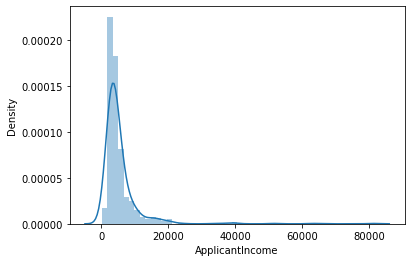

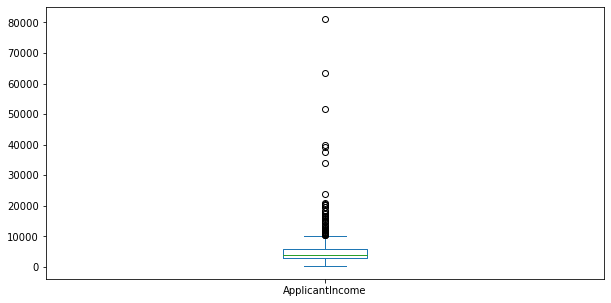

In [8]:
sns.distplot(train_df['ApplicantIncome'])
plt.show()
train_df['ApplicantIncome'].plot.box(figsize=(10,5))
plt.show()

#### its right skewed histogram

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


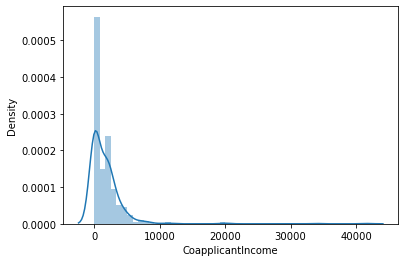

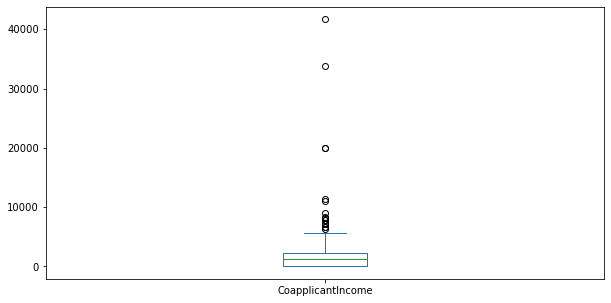

In [9]:
sns.distplot(train_df['CoapplicantIncome'])
plt.show()
train_df['CoapplicantIncome'].plot.box(figsize=(10,5))
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

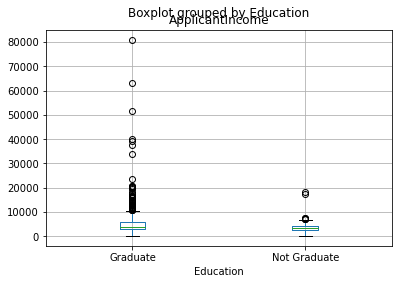

In [10]:
train_df.boxplot(column='ApplicantIncome', by ='Education')

#### Comment - The median salary does not vary too much for someone who graduate and not graduate but some graduates having  higher income 

<AxesSubplot:>

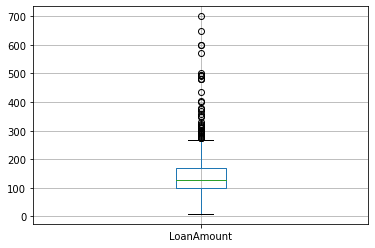

In [11]:
train_df.boxplot(column='LoanAmount')

<AxesSubplot:>

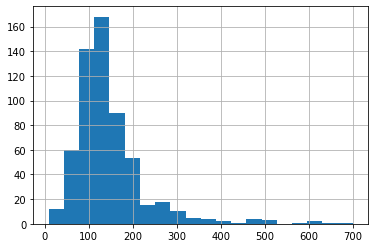

In [12]:
train_df['LoanAmount'].hist(bins=20)

<AxesSubplot:>

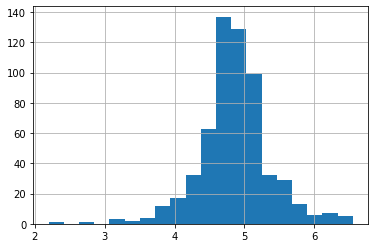

In [13]:
train_df['LoanAmount_log']=np.log(train_df['LoanAmount'])
train_df['LoanAmount_log'].hist(bins=20)

In [14]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [15]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0],inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0],inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0],inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0],inplace=True)

In [16]:
train_df.LoanAmount=train_df.LoanAmount.fillna(train_df.LoanAmount.median())
train_df.LoanAmount_log = train_df.LoanAmount_log.fillna(train_df.LoanAmount_log.median())

In [17]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109


#### loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [18]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0],inplace=True)

In [19]:
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0],inplace=True)

In [20]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [21]:
train_df['LoanAmount']

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

#### Feature 1 -Total Income


In [22]:
train_df['TotalIncome']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']
train_df['TotalIncome_log']=np.log(train_df['TotalIncome'])

<AxesSubplot:>

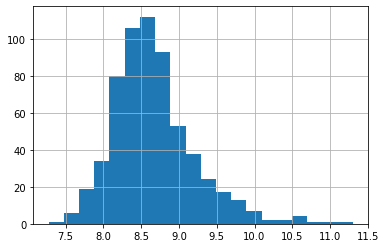

In [23]:
train_df['TotalIncome_log'].hist(bins=20)

In [24]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [25]:
train_df['Dependents'].replace('3+', 3,inplace=True)
train_df['Loan_Status'].replace('N', 0,inplace=True)
train_df['Loan_Status'].replace('Y', 1,inplace=True)

In [26]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109,7583.0,8.933664


#### Feature 2 - Loan amount and Income  Ratio

In [27]:
train_df['loan_income_ratio'] = train_df['LoanAmount'] / train_df['ApplicantIncome']
train_df[['ApplicantIncome', 'LoanAmount', 'loan_income_ratio']].head()

,ApplicantIncome,LoanAmount,loan_income_ratio
0,5849,128.0,0.021884
1,4583,128.0,0.027929
2,3000,66.0,0.022000
3,2583,120.0,0.046458
4,6000,141.0,0.023500


In [28]:
train_df.drop(['LoanAmount_log','TotalIncome_log','Loan_ID'],axis=1,inplace=True)


<AxesSubplot:>

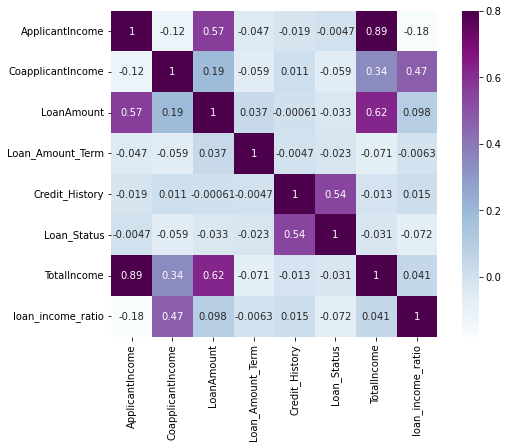

In [29]:
matrix = train_df.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [30]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,loan_income_ratio
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,0.021884
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,0.027929
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,0.022000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,0.046458
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,0.023500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,2900.0,0.024483
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,4106.0,0.009742
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,8312.0,0.031343
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,7583.0,0.024660


In [31]:
for i in [train_df]:
    i["Gender"]=i["Gender"].map({"Male":0,"Female":1}).astype(int)
    i["Married"]=i["Married"].map({"No":0,"Yes":1}).astype(int)
    i["Education"]= i["Education"].map({"Not Graduate":0,"Graduate":1}).astype(int)
    i["Self_Employed"]= i["Self_Employed"].map({"No":0,"Yes":1}).astype(int)
    i["Credit_History"]=i["Credit_History"].astype(int)

In [32]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,loan_income_ratio
0,0,0,0,1,0,5849,0.0,128.0,360.0,1,Urban,1,5849.0,0.021884
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1,Rural,0,6091.0,0.027929
2,0,1,0,1,1,3000,0.0,66.0,360.0,1,Urban,1,3000.0,0.022000
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1,Urban,1,4941.0,0.046458
4,0,0,0,1,0,6000,0.0,141.0,360.0,1,Urban,1,6000.0,0.023500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1,Rural,1,2900.0,0.024483
610,0,1,3,1,0,4106,0.0,40.0,180.0,1,Rural,1,4106.0,0.009742
611,0,1,1,1,0,8072,240.0,253.0,360.0,1,Urban,1,8312.0,0.031343
612,0,1,2,1,0,7583,0.0,187.0,360.0,1,Urban,1,7583.0,0.024660


In [33]:
from sklearn import preprocessing

In [34]:
le=preprocessing.LabelEncoder()
train_df['Property_Area']=le.fit_transform(train_df['Property_Area'])

In [35]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,loan_income_ratio
0,0,0,0,1,0,5849,0.0,128.0,360.0,1,2,1,5849.0,0.021884
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0,6091.0,0.027929
2,0,1,0,1,1,3000,0.0,66.0,360.0,1,2,1,3000.0,0.022000
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1,2,1,4941.0,0.046458
4,0,0,0,1,0,6000,0.0,141.0,360.0,1,2,1,6000.0,0.023500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1,0,1,2900.0,0.024483
610,0,1,3,1,0,4106,0.0,40.0,180.0,1,0,1,4106.0,0.009742
611,0,1,1,1,0,8072,240.0,253.0,360.0,1,2,1,8312.0,0.031343
612,0,1,2,1,0,7583,0.0,187.0,360.0,1,2,1,7583.0,0.024660


<AxesSubplot:>

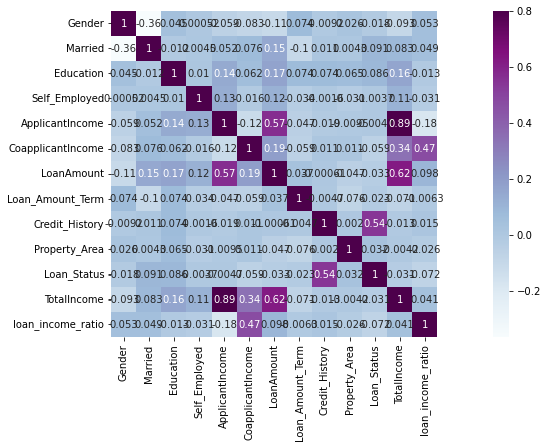

In [36]:
matrix = train_df.corr()
f, ax = plt.subplots(figsize=(20,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [37]:
x=train_df.drop("Loan_Status",axis=1)
y=train_df["Loan_Status"]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [40]:
x_train.shape

(429, 13)

In [72]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [73]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [74]:
from sklearn import metrics
print('The accuracy of decision tree is: ',metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is:  0.6864864864864865


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
ss=StandardScaler()
x_train= ss.fit_transform(x_train)
x_test= ss.fit_transform(x_test)

In [75]:
model=DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [76]:
from sklearn import metrics
print('The accuracy of decision tree is: ',metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is:  0.6864864864864865


In [48]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [50]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


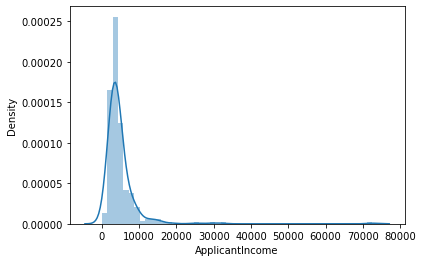

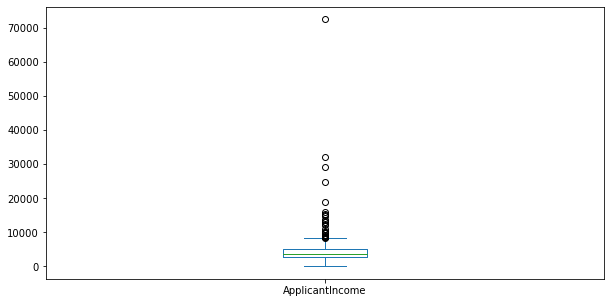

In [51]:
sns.distplot(test_df['ApplicantIncome'])
plt.show()
test_df['ApplicantIncome'].plot.box(figsize=(10,5))
plt.show()

In [52]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [53]:
test_df['Gender'].fillna(test_df['Gender'].mode()[0],inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0],inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0],inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0],inplace=True)

In [54]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [55]:
test_df.LoanAmount=test_df.LoanAmount.fillna(test_df.LoanAmount.median())
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

In [56]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4.605170
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,4.836282
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595


In [57]:
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0],inplace=True)


In [58]:
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0],inplace=True)

In [59]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595


In [60]:
test_df['TotalIncome']=test_df['ApplicantIncome']+test_df['CoapplicantIncome']
test_df['TotalIncome_log']=np.log(test_df['TotalIncome'])

In [61]:
test_df['Dependents'].replace('3+', 3,inplace=True)


In [62]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [63]:
test_df['loan_income_ratio'] = test_df['LoanAmount'] / test_df['ApplicantIncome']
test_df[['ApplicantIncome', 'LoanAmount', 'loan_income_ratio']].head()

,ApplicantIncome,LoanAmount,loan_income_ratio
0,5720,110.0,0.019231
1,3076,126.0,0.040962
2,5000,208.0,0.041600
3,2340,100.0,0.042735
4,3276,78.0,0.023810


In [64]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,loan_income_ratio
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724,0.019231
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581,0.040962
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678,0.041600
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129,0.042735
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378,0.023810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388,5786,8.663196,0.028187
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932,4867,8.490233,0.027658
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282,5243,8.564649,0.038769
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595,7393,8.908289,0.031600


In [80]:
test_df.drop(["LoanAmount_log","TotalIncome_log","Loan_ID"],axis=1,inplace=True)

KeyError: "['LoanAmount_log', 'TotalIncome_log'] not found in axis"

In [66]:
for i in [test_df]:
    i["Gender"]=i["Gender"].map({"Male":0,"Female":1}).astype(int)
    i["Married"]=i["Married"].map({"No":0,"Yes":1}).astype(int)
    i["Education"]= i["Education"].map({"Not Graduate":0,"Graduate":1}).astype(int)
    i["Self_Employed"]= i["Self_Employed"].map({"No":0,"Yes":1}).astype(int)
    i["Credit_History"]=i["Credit_History"].astype(int)

In [67]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,loan_income_ratio
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1,Urban,5720,0.019231
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1,Urban,4576,0.040962
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1,Urban,6800,0.041600
3,LP001035,0,1,2,1,0,2340,2546,100.0,360.0,1,Urban,4886,0.042735
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1,Urban,3276,0.023810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,3,0,1,4009,1777,113.0,360.0,1,Urban,5786,0.028187
363,LP002975,0,1,0,1,0,4158,709,115.0,360.0,1,Urban,4867,0.027658
364,LP002980,0,0,0,1,0,3250,1993,126.0,360.0,1,Semiurban,5243,0.038769
365,LP002986,0,1,0,1,0,5000,2393,158.0,360.0,1,Rural,7393,0.031600


In [68]:
le=preprocessing.LabelEncoder()
test_df['Property_Area']=le.fit_transform(test_df['Property_Area'])

<AxesSubplot:>

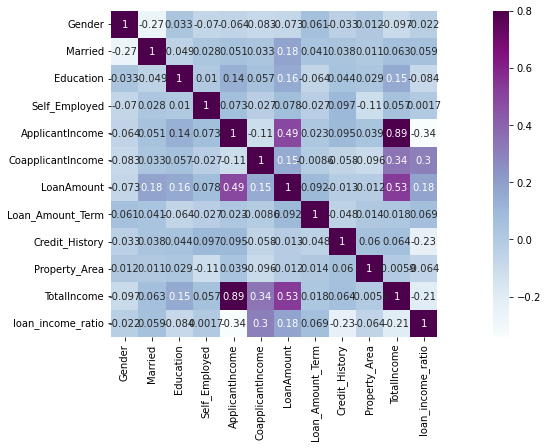

In [69]:
matrix = test_df.corr()
f, ax = plt.subplots(figsize=(20,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [78]:
pred_test=model.predict(test_df)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'LP001015'